---
<h1 align='center' style="color:green">Bitwise Operations</h1>

---

#### Bitwise operations include AND, OR, NOT and XOR. You might remember them from your programming class! In computer vision, these operations are very useful when we have a mask image and want to apply that mask over another image to extract the region of interest.
---

### 1. import the libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Read the image

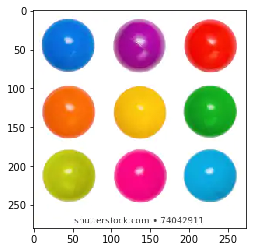

In [11]:
image=cv2.imread("images/balls.jpg")

# original image
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

### 3. apply thresholdin

In [12]:
#converting image to grayscale format
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#apply thresholding
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#get a kernel
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 2)
#extract the background from image
sure_bg = cv2.dilate(opening,kernel,iterations = 3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)

In [13]:
ret,mask=cv2.threshold(sure_fg,0,255,cv2.THRESH_BINARY_INV-cv2.THRESH_OTSU)

### 4. apply AND operation on image and mask generated by thrresholding

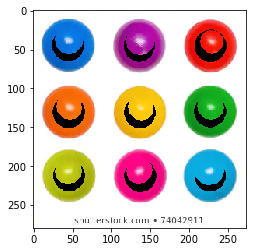

In [14]:
final=cv2.bitwise_and(image,image,mask=mask)
plt.imshow(final)

#### In the above figure, we can see an input image and its segmentation mask calculated using the Watershed algorithm. Further, we have applied the bitwise ‘AND’ operation to remove the background from the image and extract relevant portions from the image. Pretty awesome stuff!
